In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('data_of_loan.csv')

In [ ]:

pd.set_option('display.max_columns', None)


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
(df.isnull().sum()/len(df)) * 100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


<ipython-input-19-2fd7d443bfb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', palette = 'Set2', data = df)
<ipython-input-19-2fd7d443bfb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Married', palette = 'Set2', data = df)
<ipython-input-19-2fd7d443bfb5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Dependents', palette = 'Set2', data = df)
<ipython-input-19-2fd7d443bfb5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

<Axes: xlabel='Credit_History', ylabel='count'>

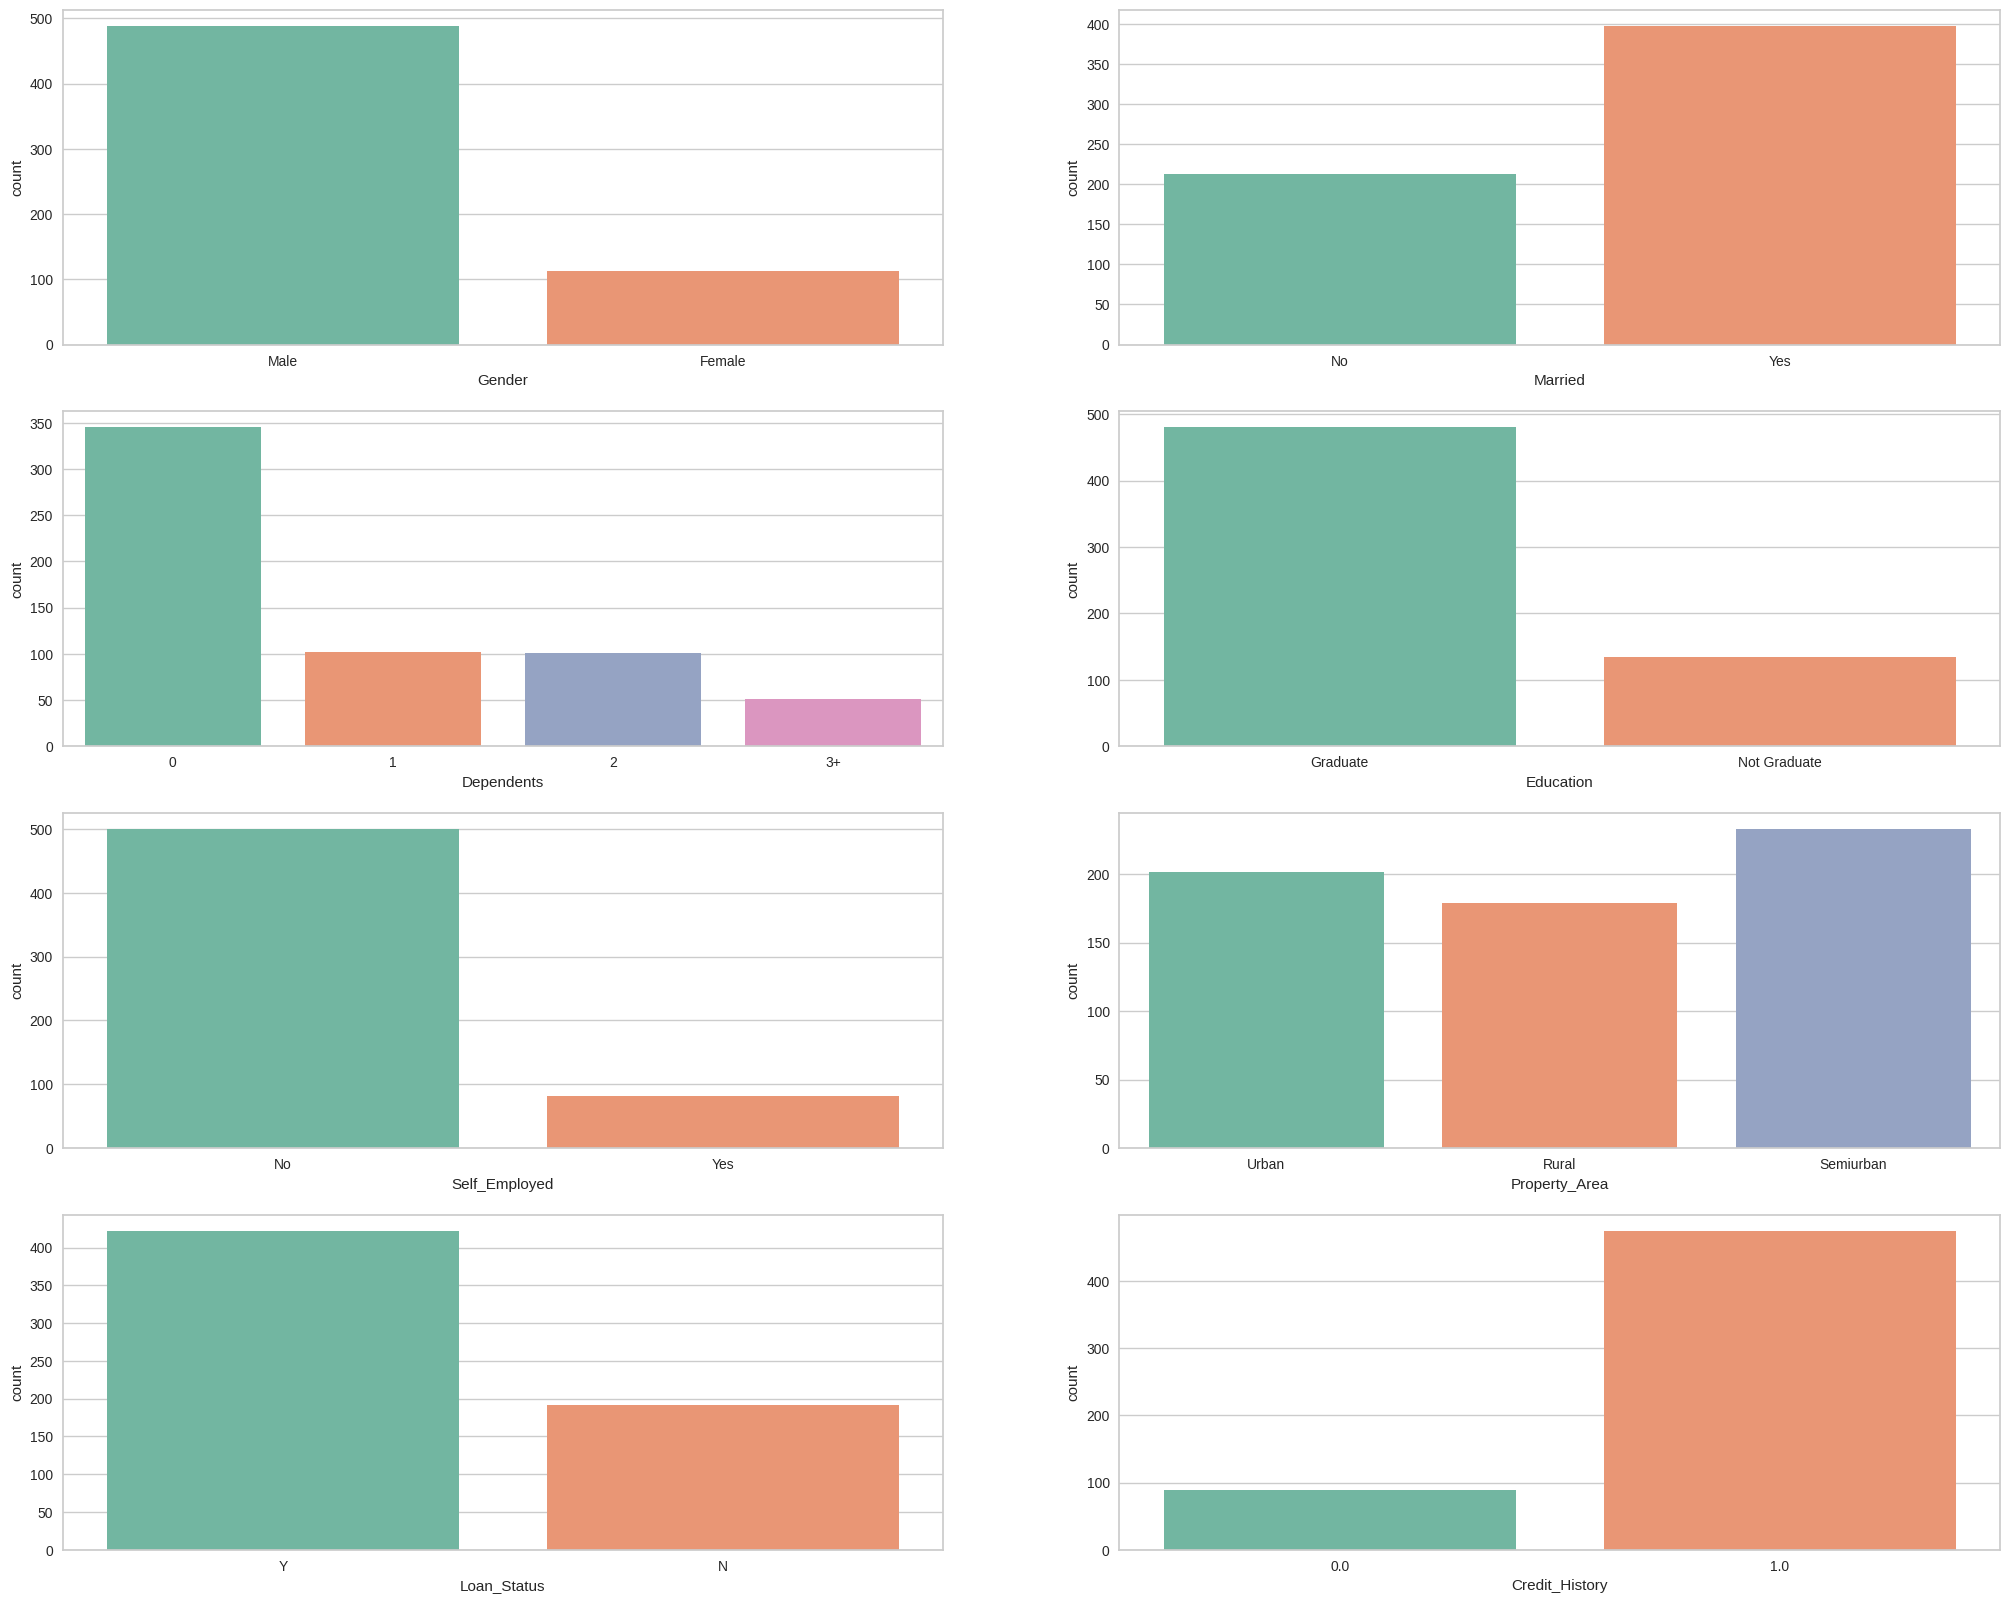

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = df)

<ipython-input-20-43f2472d884b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], kde = False)
<ipython-input-20-43f2472d884b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], kde = False)
<ipython-input-20-43f2472d884b>:11: UserWarning: 

`distplot

<Axes: xlabel='Loan_Amount_Term'>

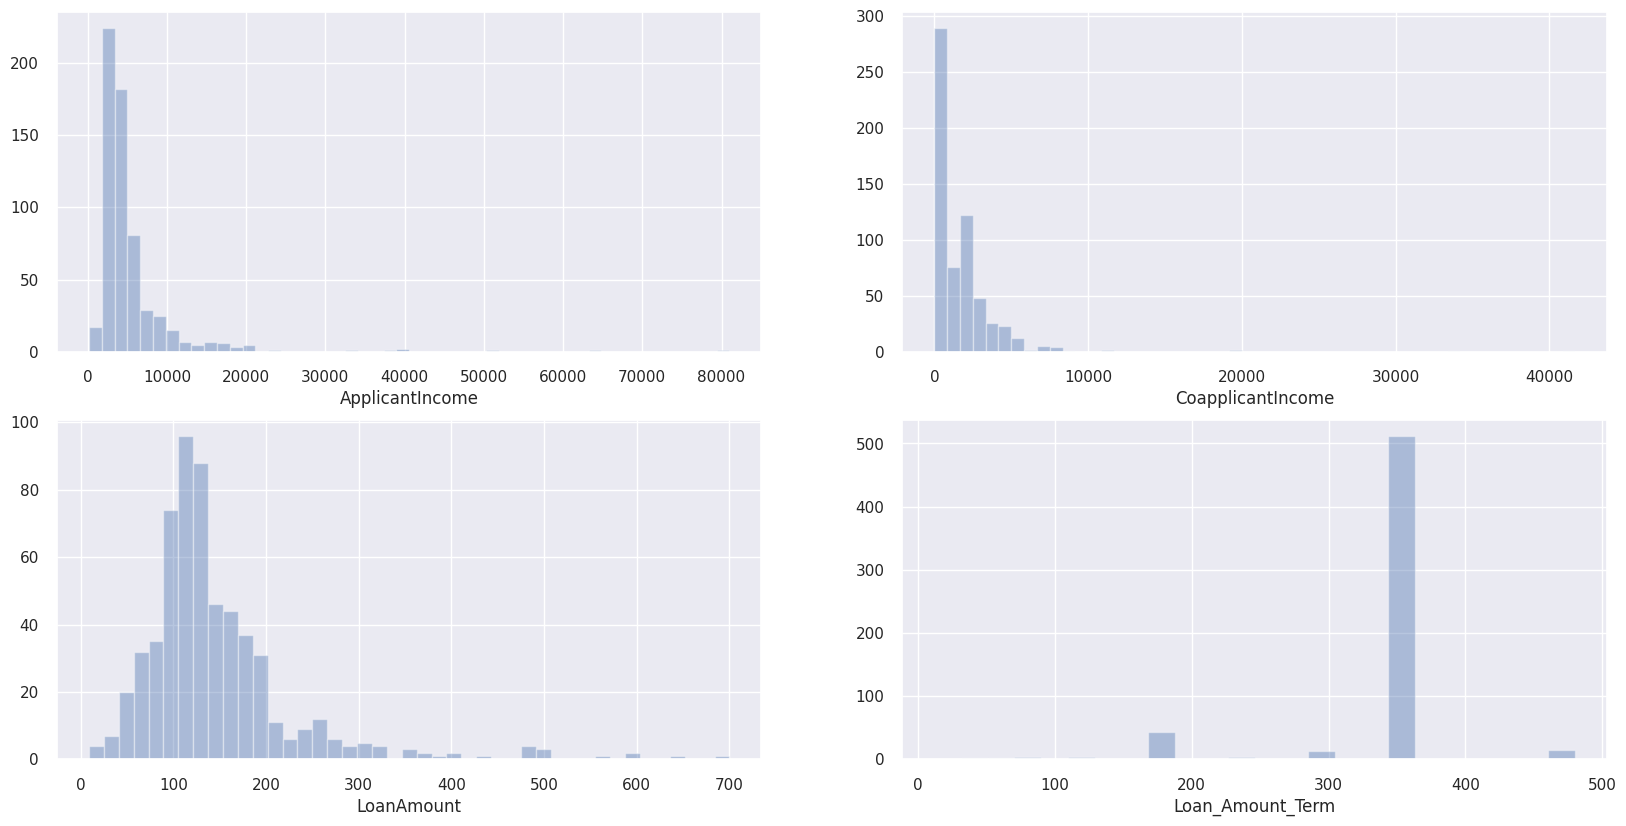

In [ ]:
plt.figure(figsize = (20,15))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df['ApplicantIncome'], kde = False)

plt.subplot(3,2,2)
sns.distplot(df['CoapplicantIncome'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['LoanAmount'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['Loan_Amount_Term'], kde = False)

<Axes: xlabel='Credit_History', ylabel='count'>

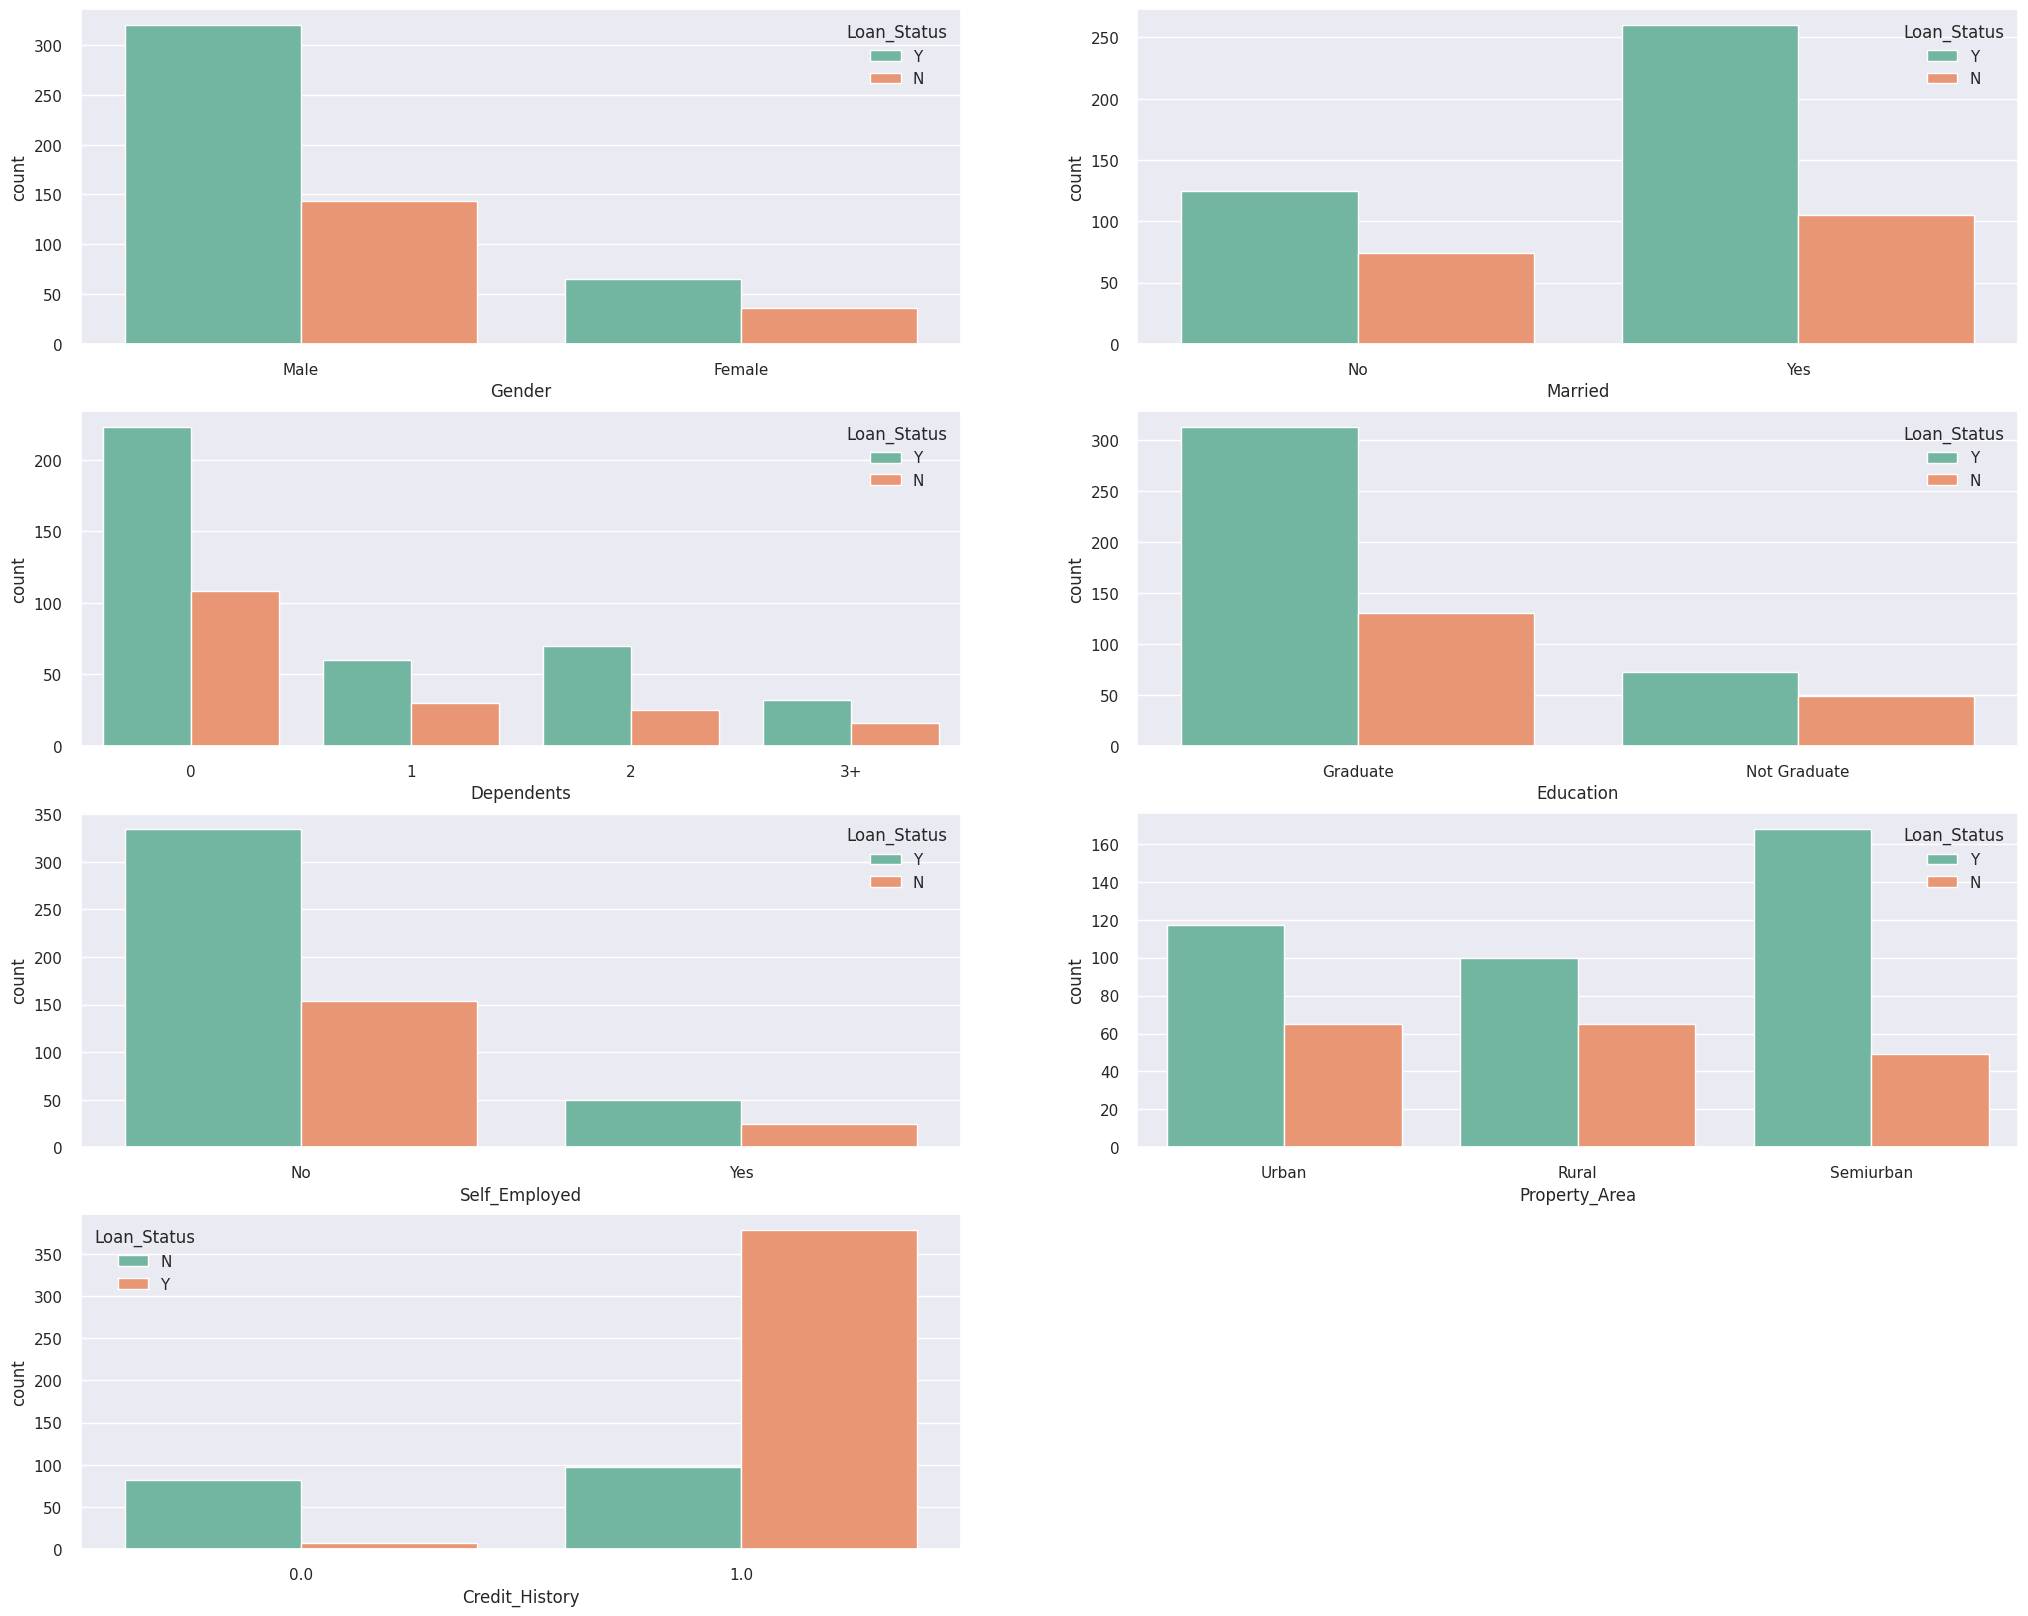

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set2', data = df)

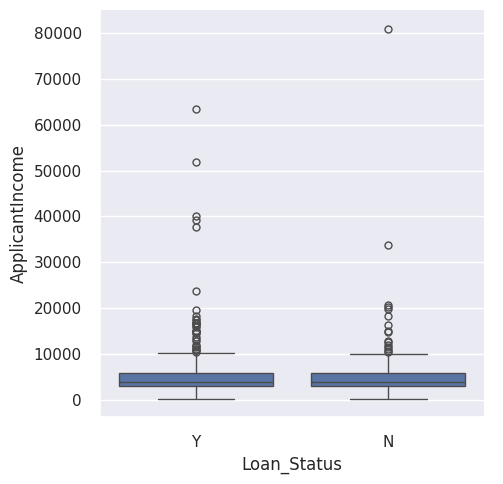

In [ ]:
sns.catplot(x = 'Loan_Status', y="ApplicantIncome", kind="box", data = df)

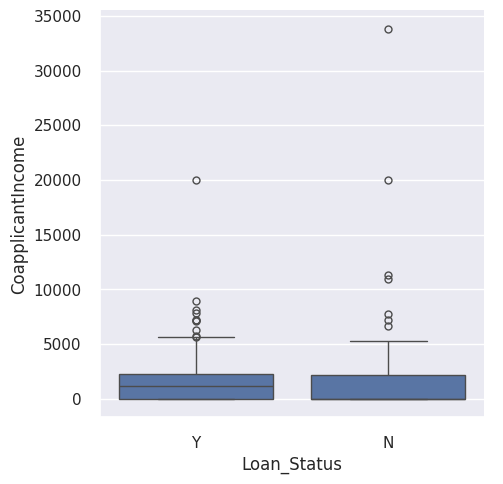

In [ ]:
sns.catplot(x = 'Loan_Status', y="CoapplicantIncome", kind="box", data = df)

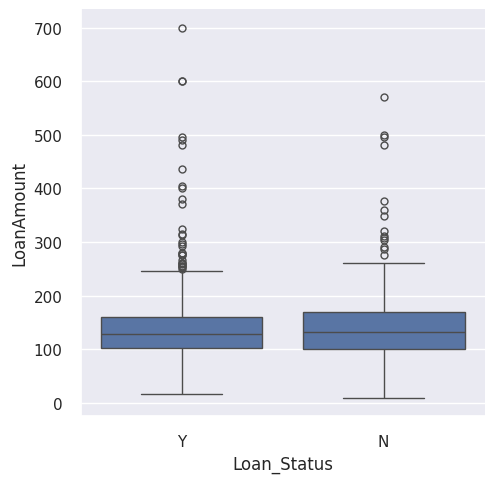

In [ ]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="box", data = df)

In [ ]:
(df.isnull().sum()/len(df)) * 100

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


In [ ]:
df = df[df['Credit_History'].notnull()]

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [ ]:
(df.isnull().sum()/len(df)) * 100

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


In [ ]:
df = df.drop('Loan_ID', axis = 1)

In [ ]:
X = df.drop('Loan_Status', axis = 1)
X = X.values
y = df['Loan_Status']

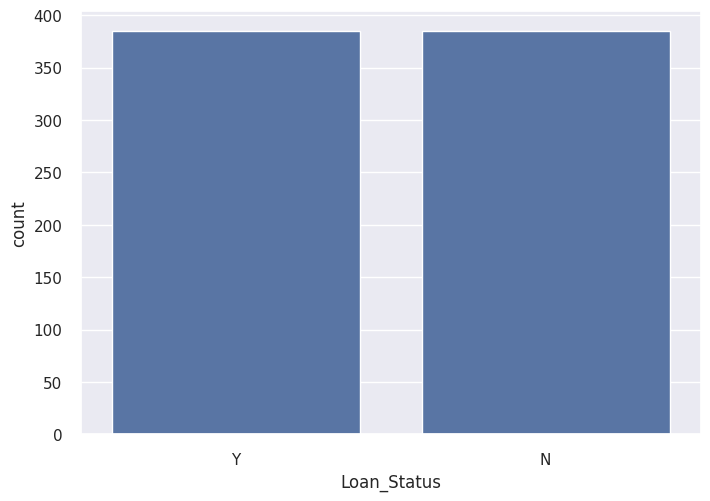

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [ ]:
X[:,0] = label_encoder_Gender.fit_transform(X[:,0])
X[:,1] = label_encoder_Married.fit_transform(X[:,1])
X[:,2] = label_encoder_Dependents.fit_transform(X[:,2])
X[:,3] = label_encoder_Education.fit_transform(X[:,3])
X[:,4] = label_encoder_Self_Employed.fit_transform(X[:,4])
X[:,10] = label_encoder_Property_Area.fit_transform(X[:,10])
y = label_encoder_Loan_Status.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)


In [ ]:
X_train.shape, y_train.shape


((539, 11), (539,))

In [ ]:
X_test.shape, y_test.shape


((231, 11), (231,))

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(X_test)


0.70995670995671

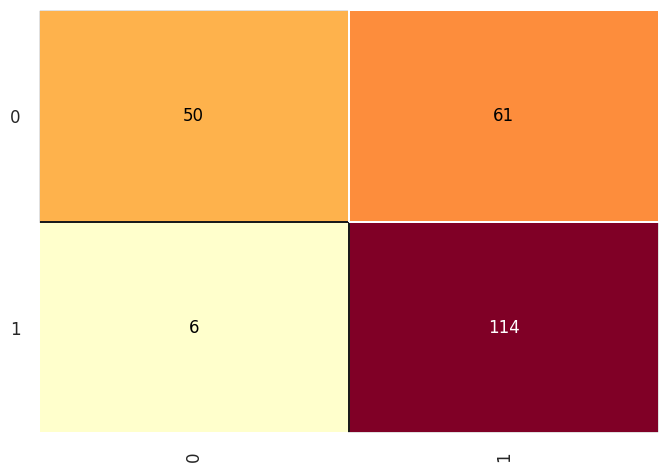

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)


              precision    recall  f1-score   support

           0       0.89      0.45      0.60       111
           1       0.65      0.95      0.77       120

    accuracy                           0.71       231
   macro avg       0.77      0.70      0.69       231
weighted avg       0.77      0.71      0.69       231



In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)


              precision    recall  f1-score   support

           0       0.89      0.45      0.60       111
           1       0.65      0.95      0.77       120

    accuracy                           0.71       231
   macro avg       0.77      0.70      0.69       231
weighted avg       0.77      0.71      0.69       231



In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
previsoes = random_forest.predict(X_test)




0.8528138528138528

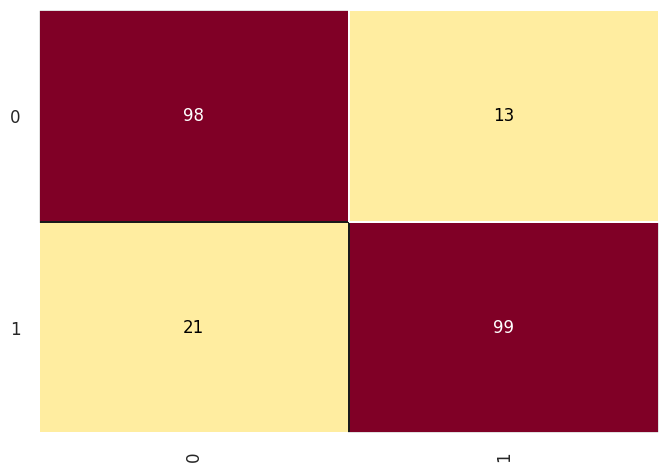

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.88      0.82      0.85       120

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



In [ ]:
columns = df.drop('Loan_Status', axis = 1).columns
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random


,0
Credit_History,0.240207
ApplicantIncome,0.214730
LoanAmount,0.182214
CoapplicantIncome,0.116487
Property_Area,0.055278
Dependents,0.047730
Loan_Amount_Term,0.047602
Married,0.028446
Education,0.025616
Gender,0.022284


In [60]:
# Function to check a single input against the trained models
def predict_loan_status(input_data, model, label_encoders, scaler):
    """
    Predict loan status for a single user input.
    Args:
        input_data (dict): Input data for prediction
        model (object): Trained ML model
        label_encoders (dict): Dictionary of label encoders for categorical variables
        scaler (object): Scaler used for feature scaling

    Returns:
        str: Loan status prediction
    """
    # Convert input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Encode categorical features
    for column, encoder in label_encoders.items():
        input_df[column] = encoder.transform(input_df[column])

    # Scale the features
    scaled_input = scaler.transform(input_df)

    # Predict loan status
    prediction = model.predict(scaled_input)
    return label_encoder_Loan_Status.inverse_transform(prediction)[0]

# Example input for prediction
sample_input = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 10000,
    'CoapplicantIncome': 5000,
    'LoanAmount': 1500,
    'Loan_Amount_Term': 360,
    'Credit_History': 0.5,
    'Property_Area': 'Urban'
}

# Prepare label encoders
label_encoders = {
    'Gender': label_encoder_Gender,
    'Married': label_encoder_Married,
    'Dependents': label_encoder_Dependents,
    'Education': label_encoder_Education,
    'Self_Employed': label_encoder_Self_Employed,
    'Property_Area': label_encoder_Property_Area
}

# Predict using Naive Bayes model
print("Naive Bayes Prediction:")
print(predict_loan_status(sample_input, naive_bayes, label_encoders, scaler))

# Predict using Random Forest model
print("\nRandom Forest Prediction:")
print(predict_loan_status(sample_input, random_forest, label_encoders, scaler))

Naive Bayes Prediction:
Y

Random Forest Prediction:
N


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Accuracy for Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes.predict(X_test))
print(f"Naive Bayes Accuracy Score: {naive_bayes_accuracy:.4f}")

# Accuracy for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test))
print(f"Random Forest Accuracy Score: {random_forest_accuracy:.4f}")

Naive Bayes Accuracy Score: 0.7100
Random Forest Accuracy Score: 0.8528
